# **Rain Prediction in Australia**

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [2]:
#import dataset
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'
df = pd.read_csv(url)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [3]:
df.shape

(3271, 22)

In [4]:
df.isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Data Preprocessing

In [5]:
#perform one hot encoding to convert categorical variables to binary variables.
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

#replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

df_sydney_processed.RainTomorrow.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow, dtype: int64

In [6]:
#set 'features' values and our Y or target variable

df_sydney_processed.drop('Date',axis=1,inplace=True)
df_sydney_processed = df_sydney_processed.astype(float)
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

# Linear Regression

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

predictions = LinearReg.predict(x_test)

#Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

model_data = {"MAE" : LinearRegression_MAE, "MSE" : LinearRegression_MSE, "R2" : LinearRegression_R2}
Report = pd.DataFrame([model_data], index=['Value'])
Report

,MAE,MSE,R2
Value,0.256309,0.115719,0.427138


# KNN

In [8]:
k = 4
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

predictions = KNN.predict(x_test)

#Evaluation
from sklearn.metrics import accuracy_score, jaccard_score, f1_score
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

model_data = {"Accuracy score" : KNN_Accuracy_Score, "Jaccard Index" : KNN_JaccardIndex, "F1 Score" : KNN_F1_Score}
model_data = pd.DataFrame([model_data], index=['Value'])
model_data

,Accuracy score,Jaccard Index,F1 Score
Value,0.818321,0.425121,0.59661


# Decision Tree

In [9]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

predictions = Tree.predict(x_test)

#Evaluation
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

model_data = {"Accuracy score" : Tree_Accuracy_Score, "Jaccard Index" : Tree_JaccardIndex, "F1 Score" : Tree_F1_Score}
model_data = pd.DataFrame([model_data], index=['Value'])
model_data

,Accuracy score,Jaccard Index,F1 Score
Value,0.754198,0.403704,0.575198


# Logistic Regression

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [11]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

predictions = LR.predict(x_test)
predict_proba = LR.predict_proba(x_test)

#Evaluation
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, predict_proba)

model_data = {"Accuracy score" : LR_Accuracy_Score, "Jaccard Index" : LR_JaccardIndex, "F1 Score" : LR_F1_Score, "LR_Log_Loss" : LR_Log_Loss}
model_data = pd.DataFrame([model_data], index=['Value'])
model_data

,Accuracy score,Jaccard Index,F1 Score,LR_Log_Loss
Value,0.836641,0.509174,0.674772,0.381259


# SVM

In [12]:
SVM = svm.SVC(kernel='linear', C=1.0)
SVM.fit(x_train, y_train)

predictions = SVM.predict(x_test)

#Evaluation
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

model_data = {"Accuracy score" : SVM_Accuracy_Score, "Jaccard Index" : SVM_JaccardIndex, "F1 Score" : SVM_F1_Score}
model_data = pd.DataFrame([model_data], index=['Value'])
model_data

,Accuracy score,Jaccard Index,F1 Score
Value,0.845802,0.534562,0.696697


# Summary of Models

In [26]:
info = {"Model" : ["KNN", "Decision Tree", "Logistic Regression", "SVM"], "Accuracy score": [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
        "Jaccard Index": [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex], "F1 Score": [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
        "LR_Log_Loss": ["N/A", "N/A", LR_Log_Loss, "N/A"]}
info = pd.DataFrame(info)
info

,Model,Accuracy score,Jaccard Index,F1 Score,LR_Log_Loss
0,KNN,0.818321,0.425121,0.596610,N/A
1,Decision Tree,0.754198,0.403704,0.575198,N/A
2,Logistic Regression,0.836641,0.509174,0.674772,0.381259
3,SVM,0.845802,0.534562,0.696697,N/A


<Axes: xlabel='Model'>

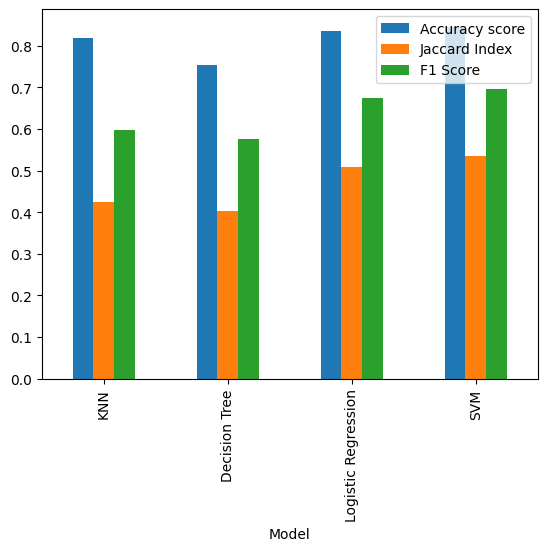

In [35]:
info.plot(x='Model', kind='bar')